In [1]:
import os
import types

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

from src.visualization.toy_example import plot_moons, plot_multiclass, show_density_grid, show_acquisition_grid, plot_performance_curves
from src.data.toy_example import generate_moons, generate_multiclass
from src.methods.acquisition_functions import EPIG
from src.methods.target_input_distribution import MultivariateGaussian

from src.models.utils import GP_sample
from src.methods.toy_example import run_active_learning_loop


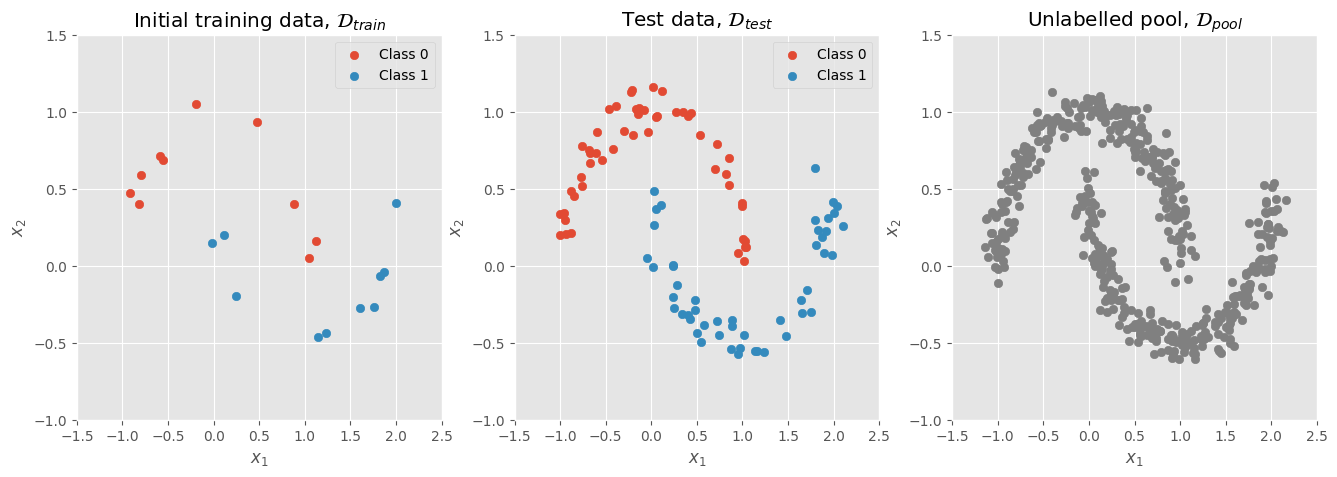

In [2]:
np.random.seed(0)

# Define dataset sizes
N_initial   = 20
N_test      = 100
N_pool      = 500
num_classes = 2

# Generate dataset partitions
Xtrain, ytrain, Xtest, ytest, Xpool, ypool = generate_moons(N_initial=N_initial, N_test=N_test, N_pool=N_pool)

# Plot the dataset partitions
plot_moons(Xtrain, ytrain, Xtest, ytest, Xpool, ypool)

In [3]:
# Define model
model           = GaussianProcessClassifier(1.0 * RBF(1.0))
model.sample    = types.MethodType( GP_sample, model )

# Train model
model.fit(Xtrain, ytrain)
# Show performance
print(f"ACCURACY\n  -> train: {model.score(Xtrain, ytrain)}\n  -> test: {model.score(Xtest, ytest)}")

ACCURACY
  -> train: 1.0
  -> test: 1.0


### Check running time of my implementation vs. the one from the authors

In [19]:
%%timeit
target_input_dist = MultivariateGaussian(mu=[0,0], Sigma=np.eye(2))

# Define acquisition function
acq_fun = EPIG(
    query_n_points=None, 
    target_input_distribution=target_input_dist,
    n_posterior_samples=5000,
    n_target_input_samples=100,
    version='mine',
)

# Get acquisition function score and the items to query
_, query_idxs = acq_fun(Xpool, model=model)

4.87 s ± 356 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [20]:
%%timeit
target_input_dist = MultivariateGaussian(mu=[0,0], Sigma=np.eye(2))

# Define acquisition function
acq_fun = EPIG(
    query_n_points=None, 
    target_input_distribution=target_input_dist,
    n_posterior_samples=5000,
    n_target_input_samples=100,
    version='theirs',
)

# Get acquisition function score and the items to query
_, query_idxs = acq_fun(Xpool, model=model)

9.43 s ± 1.66 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Visual inspection of changing the number of posterior samples, target input distribution samples and the mean of the target input distribution

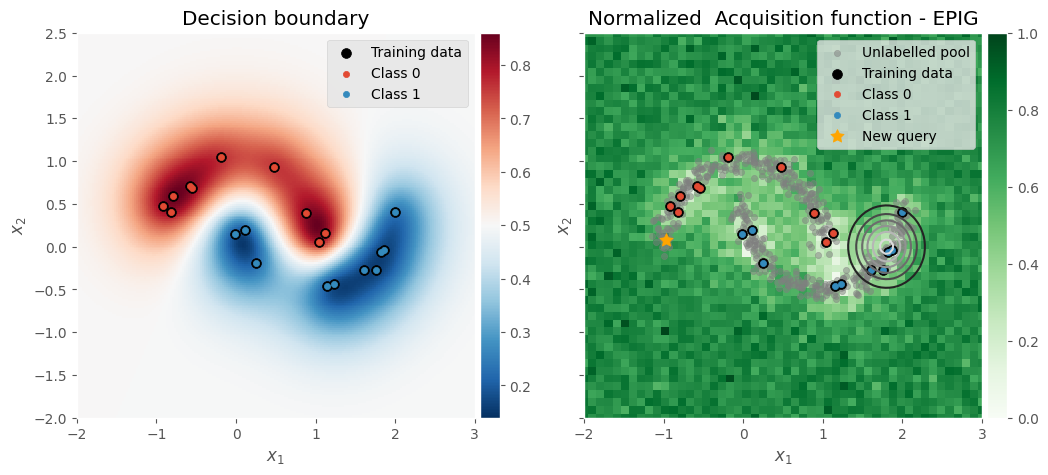

In [9]:
target_input_dist = MultivariateGaussian(mu=[1.8, 0], Sigma=np.eye(2) / 4)

# Define acquisition function
acq_fun = EPIG(
    query_n_points=None, 
    target_input_distribution=target_input_dist,
    n_posterior_samples=100,
    n_target_input_samples=5000,
    version='mine',
)

# Get acquisition function score and the items to query
_, query_idxs = acq_fun(Xpool, model=model)
next_query = Xpool[query_idxs[0]]


### PLOT DECISION BOUNDARY AND ACQUISITION FUNCTION ###
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True, sharex=True)

# Plot model uncertainty across grid
axs[0] = show_density_grid(model, Xtrain, Xtest, ytrain, ytest, zoom=([-2, 3], [-2, 2.5]), ax=axs[0], fig=fig)
axs[0].legend()

# Plot acquisition function across a grid
axs[1] = show_acquisition_grid(model, acq_fun, Xtrain, ytrain, Xpool, zoom=([-2, 3], [-2, 2.5]), P=50, ax=axs[1], fig=fig)
axs[1].scatter(next_query[0], next_query[1], color='orange', marker=(5, 1), s=100, label='New query')
axs[1].legend()

# Plot target input distribution on top
target_input_dist.plot_2D(ax=axs[1], zoom=([-2, 3], [-2, 2.5]))

plt.show()

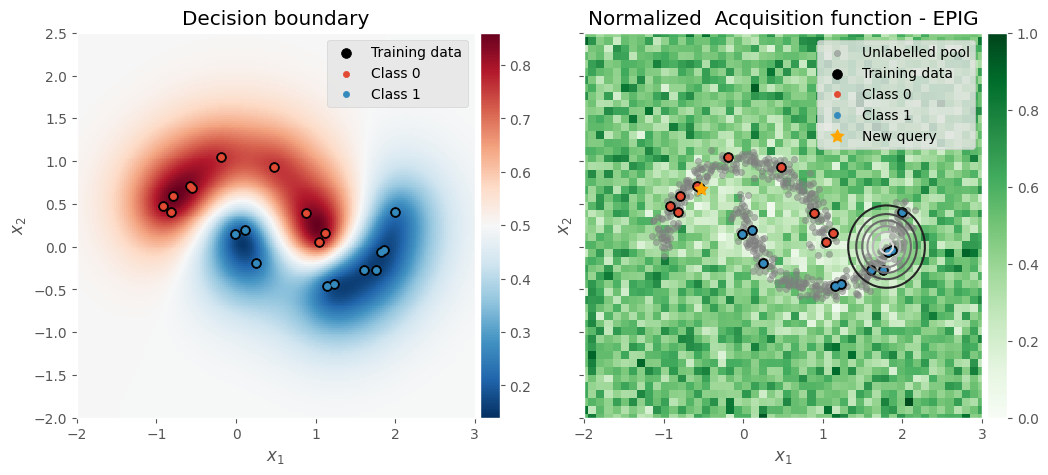

In [8]:
target_input_dist = MultivariateGaussian(mu=[1.8, 0], Sigma=np.eye(2) / 4)

# Define acquisition function
acq_fun = EPIG(
    query_n_points=None, 
    target_input_distribution=target_input_dist,
    n_posterior_samples=100,
    n_target_input_samples=100,
    version='mine',
)

# Get acquisition function score and the items to query
_, query_idxs = acq_fun(Xpool, model=model)
next_query = Xpool[query_idxs[0]]


### PLOT DECISION BOUNDARY AND ACQUISITION FUNCTION ###
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True, sharex=True)

# Plot model uncertainty across grid
axs[0] = show_density_grid(model, Xtrain, Xtest, ytrain, ytest, zoom=([-2, 3], [-2, 2.5]), ax=axs[0], fig=fig)
axs[0].legend()

# Plot acquisition function across a grid
axs[1] = show_acquisition_grid(model, acq_fun, Xtrain, ytrain, Xpool, zoom=([-2, 3], [-2, 2.5]), P=50, ax=axs[1], fig=fig)
axs[1].scatter(next_query[0], next_query[1], color='orange', marker=(5, 1), s=100, label='New query')
axs[1].legend()

# Plot target input distribution on top
target_input_dist.plot_2D(ax=axs[1], zoom=([-2, 3], [-2, 2.5]))

plt.show()

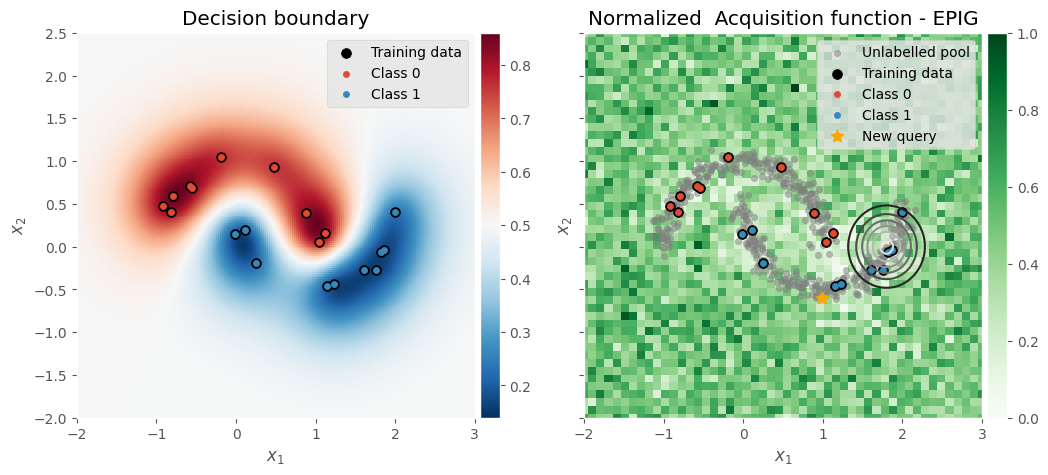

In [7]:
target_input_dist = MultivariateGaussian(mu=[1.8, 0], Sigma=np.eye(2) / 4)

# Define acquisition function
acq_fun = EPIG(
    query_n_points=None, 
    target_input_distribution=target_input_dist,
    n_posterior_samples=5000,
    n_target_input_samples=100,
    version='mine',
)

# Get acquisition function score and the items to query
_, query_idxs = acq_fun(Xpool, model=model)
next_query = Xpool[query_idxs[0]]


### PLOT DECISION BOUNDARY AND ACQUISITION FUNCTION ###
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True, sharex=True)

# Plot model uncertainty across grid
axs[0] = show_density_grid(model, Xtrain, Xtest, ytrain, ytest, zoom=([-2, 3], [-2, 2.5]), ax=axs[0], fig=fig)
axs[0].legend()

# Plot acquisition function across a grid
axs[1] = show_acquisition_grid(model, acq_fun, Xtrain, ytrain, Xpool, zoom=([-2, 3], [-2, 2.5]), P=50, ax=axs[1], fig=fig)
axs[1].scatter(next_query[0], next_query[1], color='orange', marker=(5, 1), s=100, label='New query')
axs[1].legend()

# Plot target input distribution on top
target_input_dist.plot_2D(ax=axs[1], zoom=([-2, 3], [-2, 2.5]))

plt.show()

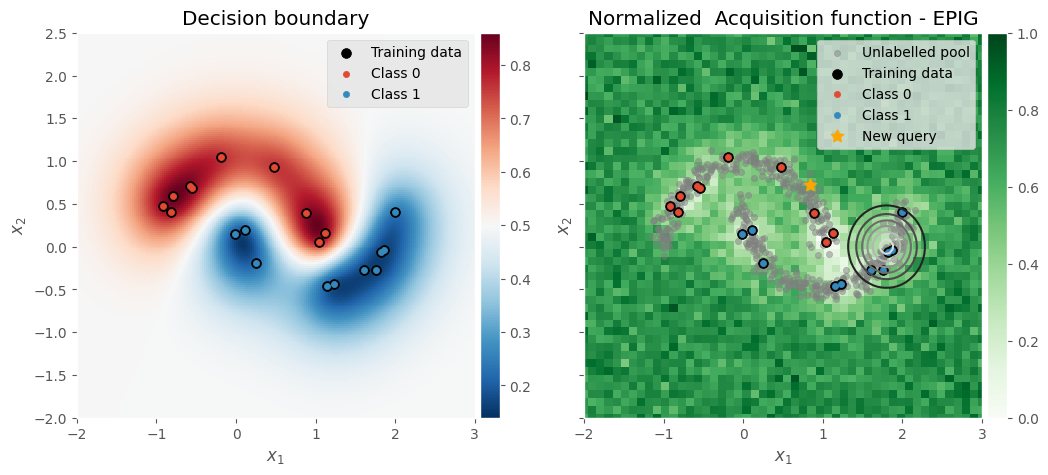

In [6]:
target_input_dist = MultivariateGaussian(mu=[1.8, 0], Sigma=np.eye(2) / 4)

# Define acquisition function
acq_fun = EPIG(
    query_n_points=None, 
    target_input_distribution=target_input_dist,
    n_posterior_samples=1000,
    n_target_input_samples=1000,
    version='mine',
)

# Get acquisition function score and the items to query
_, query_idxs = acq_fun(Xpool, model=model)
next_query = Xpool[query_idxs[0]]


### PLOT DECISION BOUNDARY AND ACQUISITION FUNCTION ###
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True, sharex=True)

# Plot model uncertainty across grid
axs[0] = show_density_grid(model, Xtrain, Xtest, ytrain, ytest, zoom=([-2, 3], [-2, 2.5]), ax=axs[0], fig=fig)
axs[0].legend()

# Plot acquisition function across a grid
axs[1] = show_acquisition_grid(model, acq_fun, Xtrain, ytrain, Xpool, zoom=([-2, 3], [-2, 2.5]), P=50, ax=axs[1], fig=fig)
axs[1].scatter(next_query[0], next_query[1], color='orange', marker=(5, 1), s=100, label='New query')
axs[1].legend()

# Plot target input distribution on top
target_input_dist.plot_2D(ax=axs[1], zoom=([-2, 3], [-2, 2.5]))

plt.show()

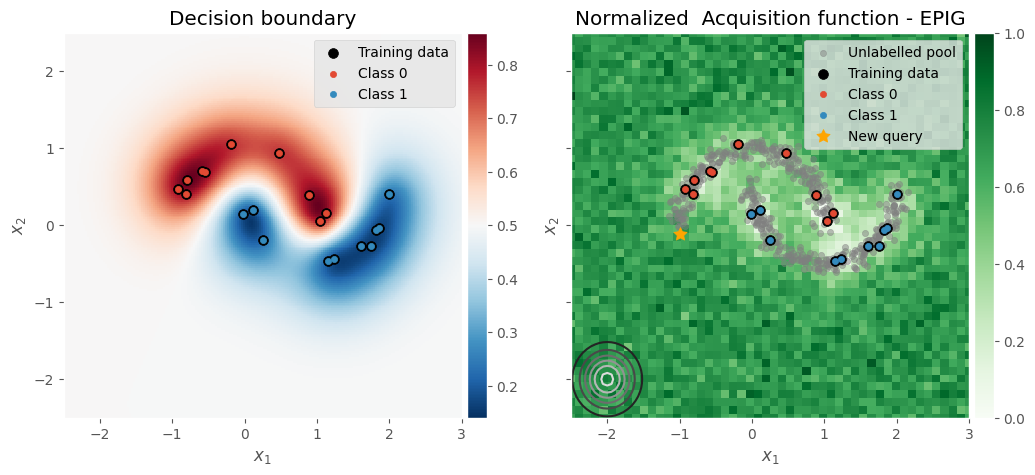

In [10]:
target_input_dist = MultivariateGaussian(mu=[-2, -2], Sigma=np.eye(2) / 4)

# Define acquisition function
acq_fun = EPIG(
    query_n_points=None, 
    target_input_distribution=target_input_dist,
    n_posterior_samples=1000,
    n_target_input_samples=1000,
    version='mine',
)

# Get acquisition function score and the items to query
_, query_idxs = acq_fun(Xpool, model=model)
next_query = Xpool[query_idxs[0]]


### PLOT DECISION BOUNDARY AND ACQUISITION FUNCTION ###
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True, sharex=True)

# Plot model uncertainty across grid
axs[0] = show_density_grid(model, Xtrain, Xtest, ytrain, ytest, zoom=([-2.5, 3], [-2.5, 2.5]), ax=axs[0], fig=fig)
axs[0].legend()

# Plot acquisition function across a grid
axs[1] = show_acquisition_grid(model, acq_fun, Xtrain, ytrain, Xpool, zoom=([-2.5, 3], [-2.5, 2.5]), P=50, ax=axs[1], fig=fig)
axs[1].scatter(next_query[0], next_query[1], color='orange', marker=(5, 1), s=100, label='New query')
axs[1].legend()

# Plot target input distribution on top
target_input_dist.plot_2D(ax=axs[1], zoom=([-2.5, 3], [-2.5, 2.5]))

plt.show()

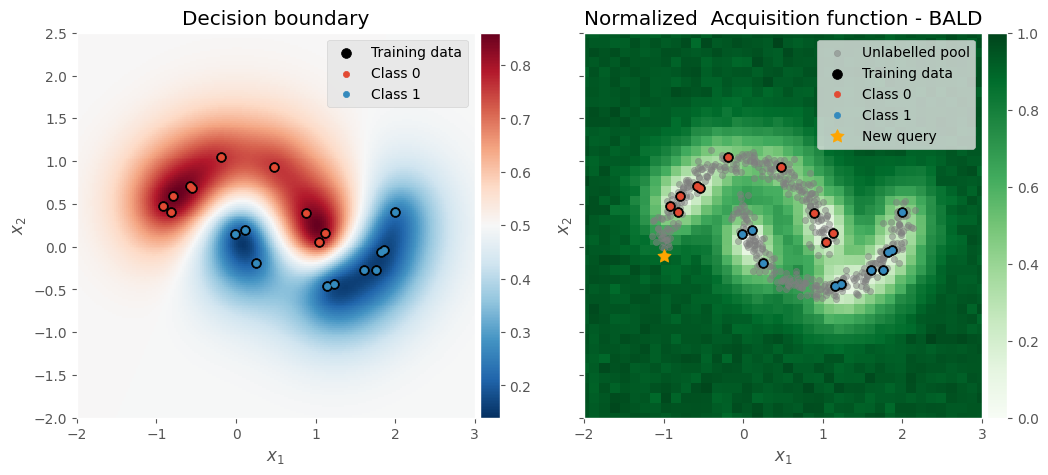

In [12]:
from src.methods.acquisition_functions import BALD

# Define acquisition function
acq_fun = BALD(
    query_n_points=None, 
    n_posterior_samples=1000,
)

# Get acquisition function score and the items to query
_, query_idxs = acq_fun(Xpool, model=model)
next_query = Xpool[query_idxs[0]]

### PLOT DECISION BOUNDARY AND ACQUISITION FUNCTION ###
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True, sharex=True)

# Plot model uncertainty across grid
axs[0] = show_density_grid(model, Xtrain, Xtest, ytrain, ytest, zoom=([-2, 3], [-2, 2.5]), ax=axs[0], fig=fig)
axs[0].legend()

# Plot acquisition function across a grid
axs[1] = show_acquisition_grid(model, acq_fun, Xtrain, ytrain, Xpool, zoom=([-2, 3], [-2, 2.5]), P=40, ax=axs[1], fig=fig)
axs[1].scatter(next_query[0], next_query[1], color='orange', marker=(5, 1), s=100, label='New query')
axs[1].legend()

plt.show()

### Run active learning loop

In [11]:
# Define dataset sizes
N_initial   = 4
N_test      = 100
N_pool      = 100
N_iter      = 10
num_classes = 2
seed        = 0

target_input_dist = MultivariateGaussian(mu=[0, 0], Sigma=np.eye(2) / 4)

# Define acquisition function
acq_fun = EPIG(
    query_n_points=None, 
    target_input_distribution=target_input_dist,
    n_posterior_samples=2000,
    n_target_input_samples=100,
    version='mine',
)

# Define acquisition function
np.random.seed(seed)

print(f"{'-'*10} RUNNING {acq_fun.name} ACQUISITION FUNCTION{'-'*10}")

# Define model
model           = GaussianProcessClassifier(1.0 * RBF(1.0))
model.sample    = types.MethodType( GP_sample, model )

# Generate dataset partitions
Xtrain, ytrain, Xtest, ytest, Xpool, ypool = generate_moons(N_initial=N_initial, N_test=N_test, N_pool=N_pool)

# Run active learning loop
model, performance, Xtrain, ytrain = run_active_learning_loop(
    model,
    acq_fun=acq_fun,
    target_input_distribution=target_input_dist,
    Xtrain=Xtrain, Xtest=Xtest, Xpool=Xpool, 
    ytrain=ytrain, ytest=ytest, ypool=ypool,
    n_iterations=N_iter,
    save_fig=True, 
    animate=True, fps=1,
    num_classes=num_classes,
    seed=seed
)